# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
pt_df=pd.read_csv('cars24.csv')


In [3]:
pt_df.head()

,Unnamed: 0,Car_Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


# Exploratory Data Analysis (EDA)

In [4]:
pt_df.shape

(8015, 10)

In [5]:
# remove unnecessary cloumn
pt_df.drop(['Unnamed: 0'] ,axis=1,inplace=True)
pt_df.drop(['Location'] ,axis=1,inplace=True)

In [6]:
#After remove unnecessary cloumn
pt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car_Name  8014 non-null   object 
 1   Year      8014 non-null   float64
 2   Distance  8015 non-null   int64  
 3   Owner     8015 non-null   int64  
 4   Fuel      8015 non-null   object 
 5   Drive     8015 non-null   object 
 6   Type      8015 non-null   object 
 7   Price     8015 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 501.1+ KB


In [7]:
pt_df.columns

Index(['Car_Name', 'Year', 'Distance', 'Owner', 'Fuel', 'Drive', 'Type',
       'Price'],
      dtype='object')

In [8]:
pt_df.apply(lambda x: len(x.unique()))

Car_Name     127
Year          15
Distance    7715
Owner          4
Fuel           4
Drive          2
Type           5
Price       1354
dtype: int64

In [9]:
pt_df.describe()

,Year,Distance,Owner,Price
count,8014.000000,8015.000000,8015.000000,8.015000e+03
mean,2016.995009,52621.411728,1.300187,5.748829e+05
std,2.861454,29182.922728,0.510893,2.651049e+05
min,2010.000000,0.000000,1.000000,1.190000e+05
25%,2015.000000,30730.000000,1.000000,3.930000e+05
50%,2017.000000,50359.000000,1.000000,5.350000e+05
75%,2019.000000,71762.000000,2.000000,6.980000e+05
max,2023.000000,971212.000000,4.000000,3.300000e+06


In [10]:
avg=pt_df.groupby('Fuel')['Price'].mean()
avg

Fuel
CNG       506422.336449
DIESEL    771751.360225
LPG       317000.000000
PETROL    547909.901762
Name: Price, dtype: float64

In [11]:
#remove outlier
Q1 = pt_df['Price'].quantile(0.25)
Q3 = pt_df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [12]:
up_limit=Q3+(1.5*IQR)
lw_limit=Q1-(1.5*IQR)
lw_limit,up_limit

(-64500.0, 1155500.0)

<Axes: >

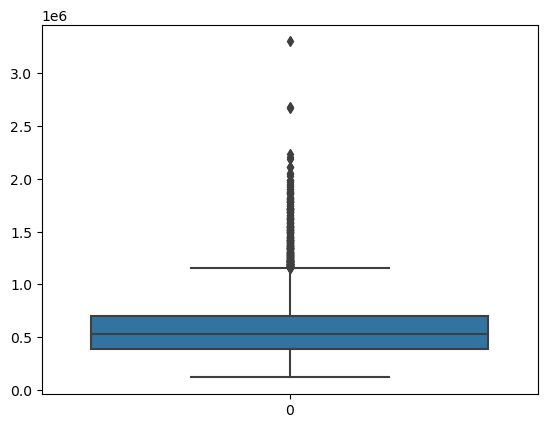

In [13]:
sns.boxplot(pt_df['Price'])

In [14]:
dff=pt_df.loc[(pt_df['Price']<up_limit) & (pt_df['Price']>lw_limit)]
print('Data before removing outliers',len(pt_df))
print('Data after removing outliers',len(dff))
print('outliers',len(pt_df)-len(dff))

Data before removing outliers 8015
Data after removing outliers 7765
outliers 250


<Axes: >

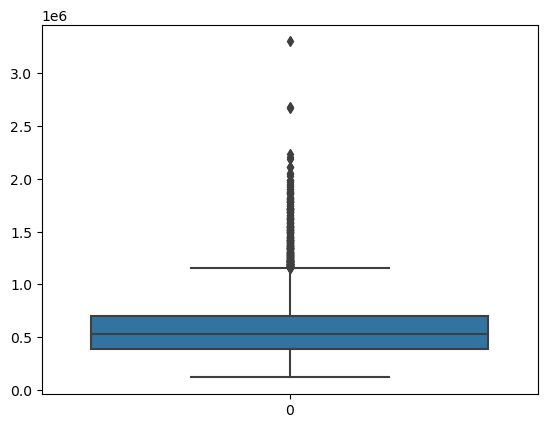

In [15]:
sns.boxplot(pt_df['Price'])

In [16]:
#capping = change the outlier value to upper or lower limit value
dff=pt_df.copy()
dff.loc[(dff['Price']>up_limit),'Price']=up_limit
dff.loc[(dff['Price']<lw_limit),'Price']=lw_limit


<Axes: >

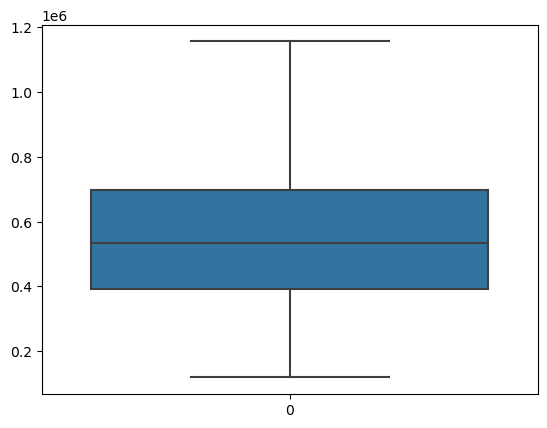

In [17]:
sns.boxplot(dff['Price'])

In [18]:
dff.describe()

,Year,Distance,Owner,Price
count,8014.000000,8015.000000,8015.000000,8.015000e+03
mean,2016.995009,52621.411728,1.300187,5.649018e+05
std,2.861454,29182.922728,0.510893,2.293739e+05
min,2010.000000,0.000000,1.000000,1.190000e+05
25%,2015.000000,30730.000000,1.000000,3.930000e+05
50%,2017.000000,50359.000000,1.000000,5.350000e+05
75%,2019.000000,71762.000000,2.000000,6.980000e+05
max,2023.000000,971212.000000,4.000000,1.155500e+06


In [19]:
dff.isna().sum()

Car_Name    1
Year        1
Distance    0
Owner       0
Fuel        0
Drive       0
Type        0
Price       0
dtype: int64

In [20]:
# Replace the null values in "car_name" and "year from "Honda city" and "2020"
dff["Car_Name"].fillna("Honda City", inplace = True)
dff["Year"].fillna(2020, inplace = True)

In [21]:
dff.isna().sum()

Car_Name    0
Year        0
Distance    0
Owner       0
Fuel        0
Drive       0
Type        0
Price       0
dtype: int64

# Data Visualization

<Axes: xlabel='Type', ylabel='count'>

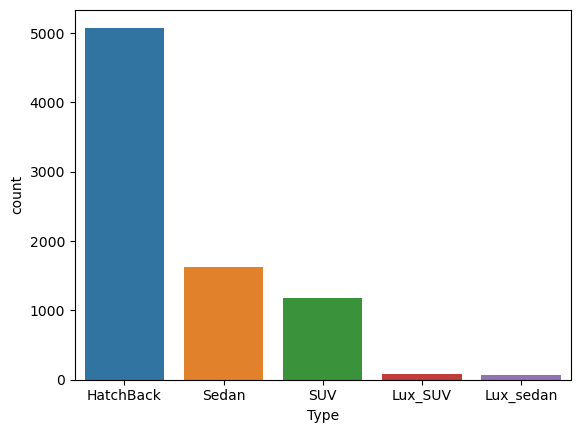

In [22]:
sns.countplot(data=dff, x="Type")

<Axes: xlabel='Price', ylabel='Density'>

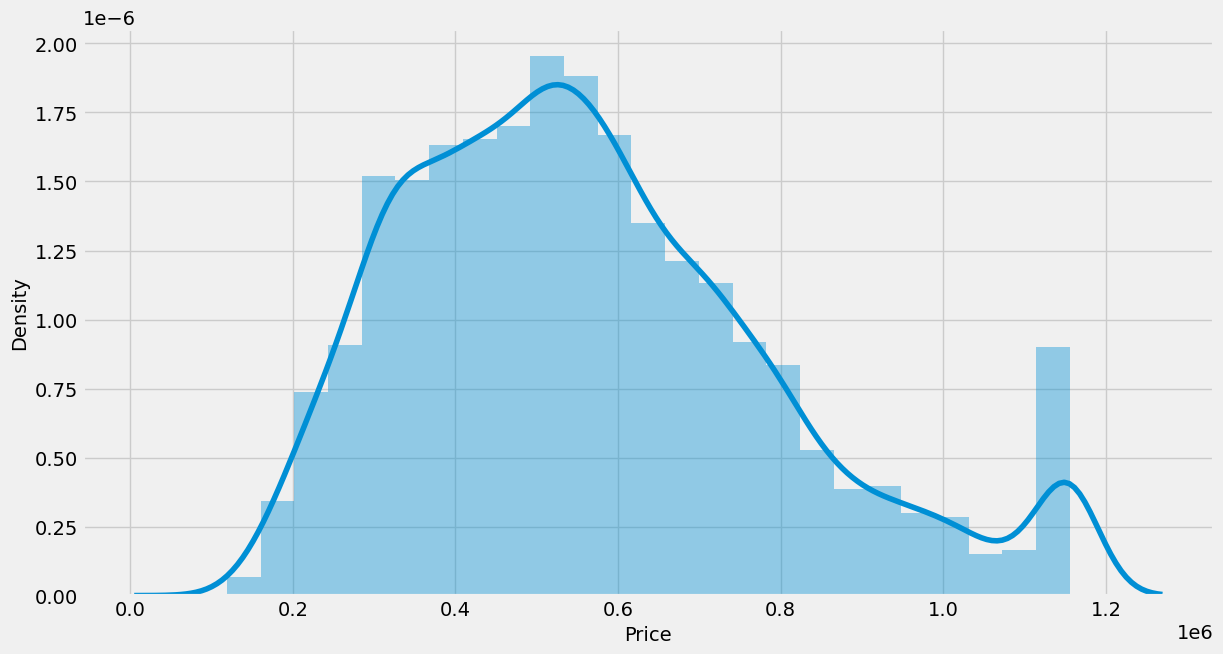

In [23]:
# distplot for price
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(dff['Price'], bins=25)

<Axes: >

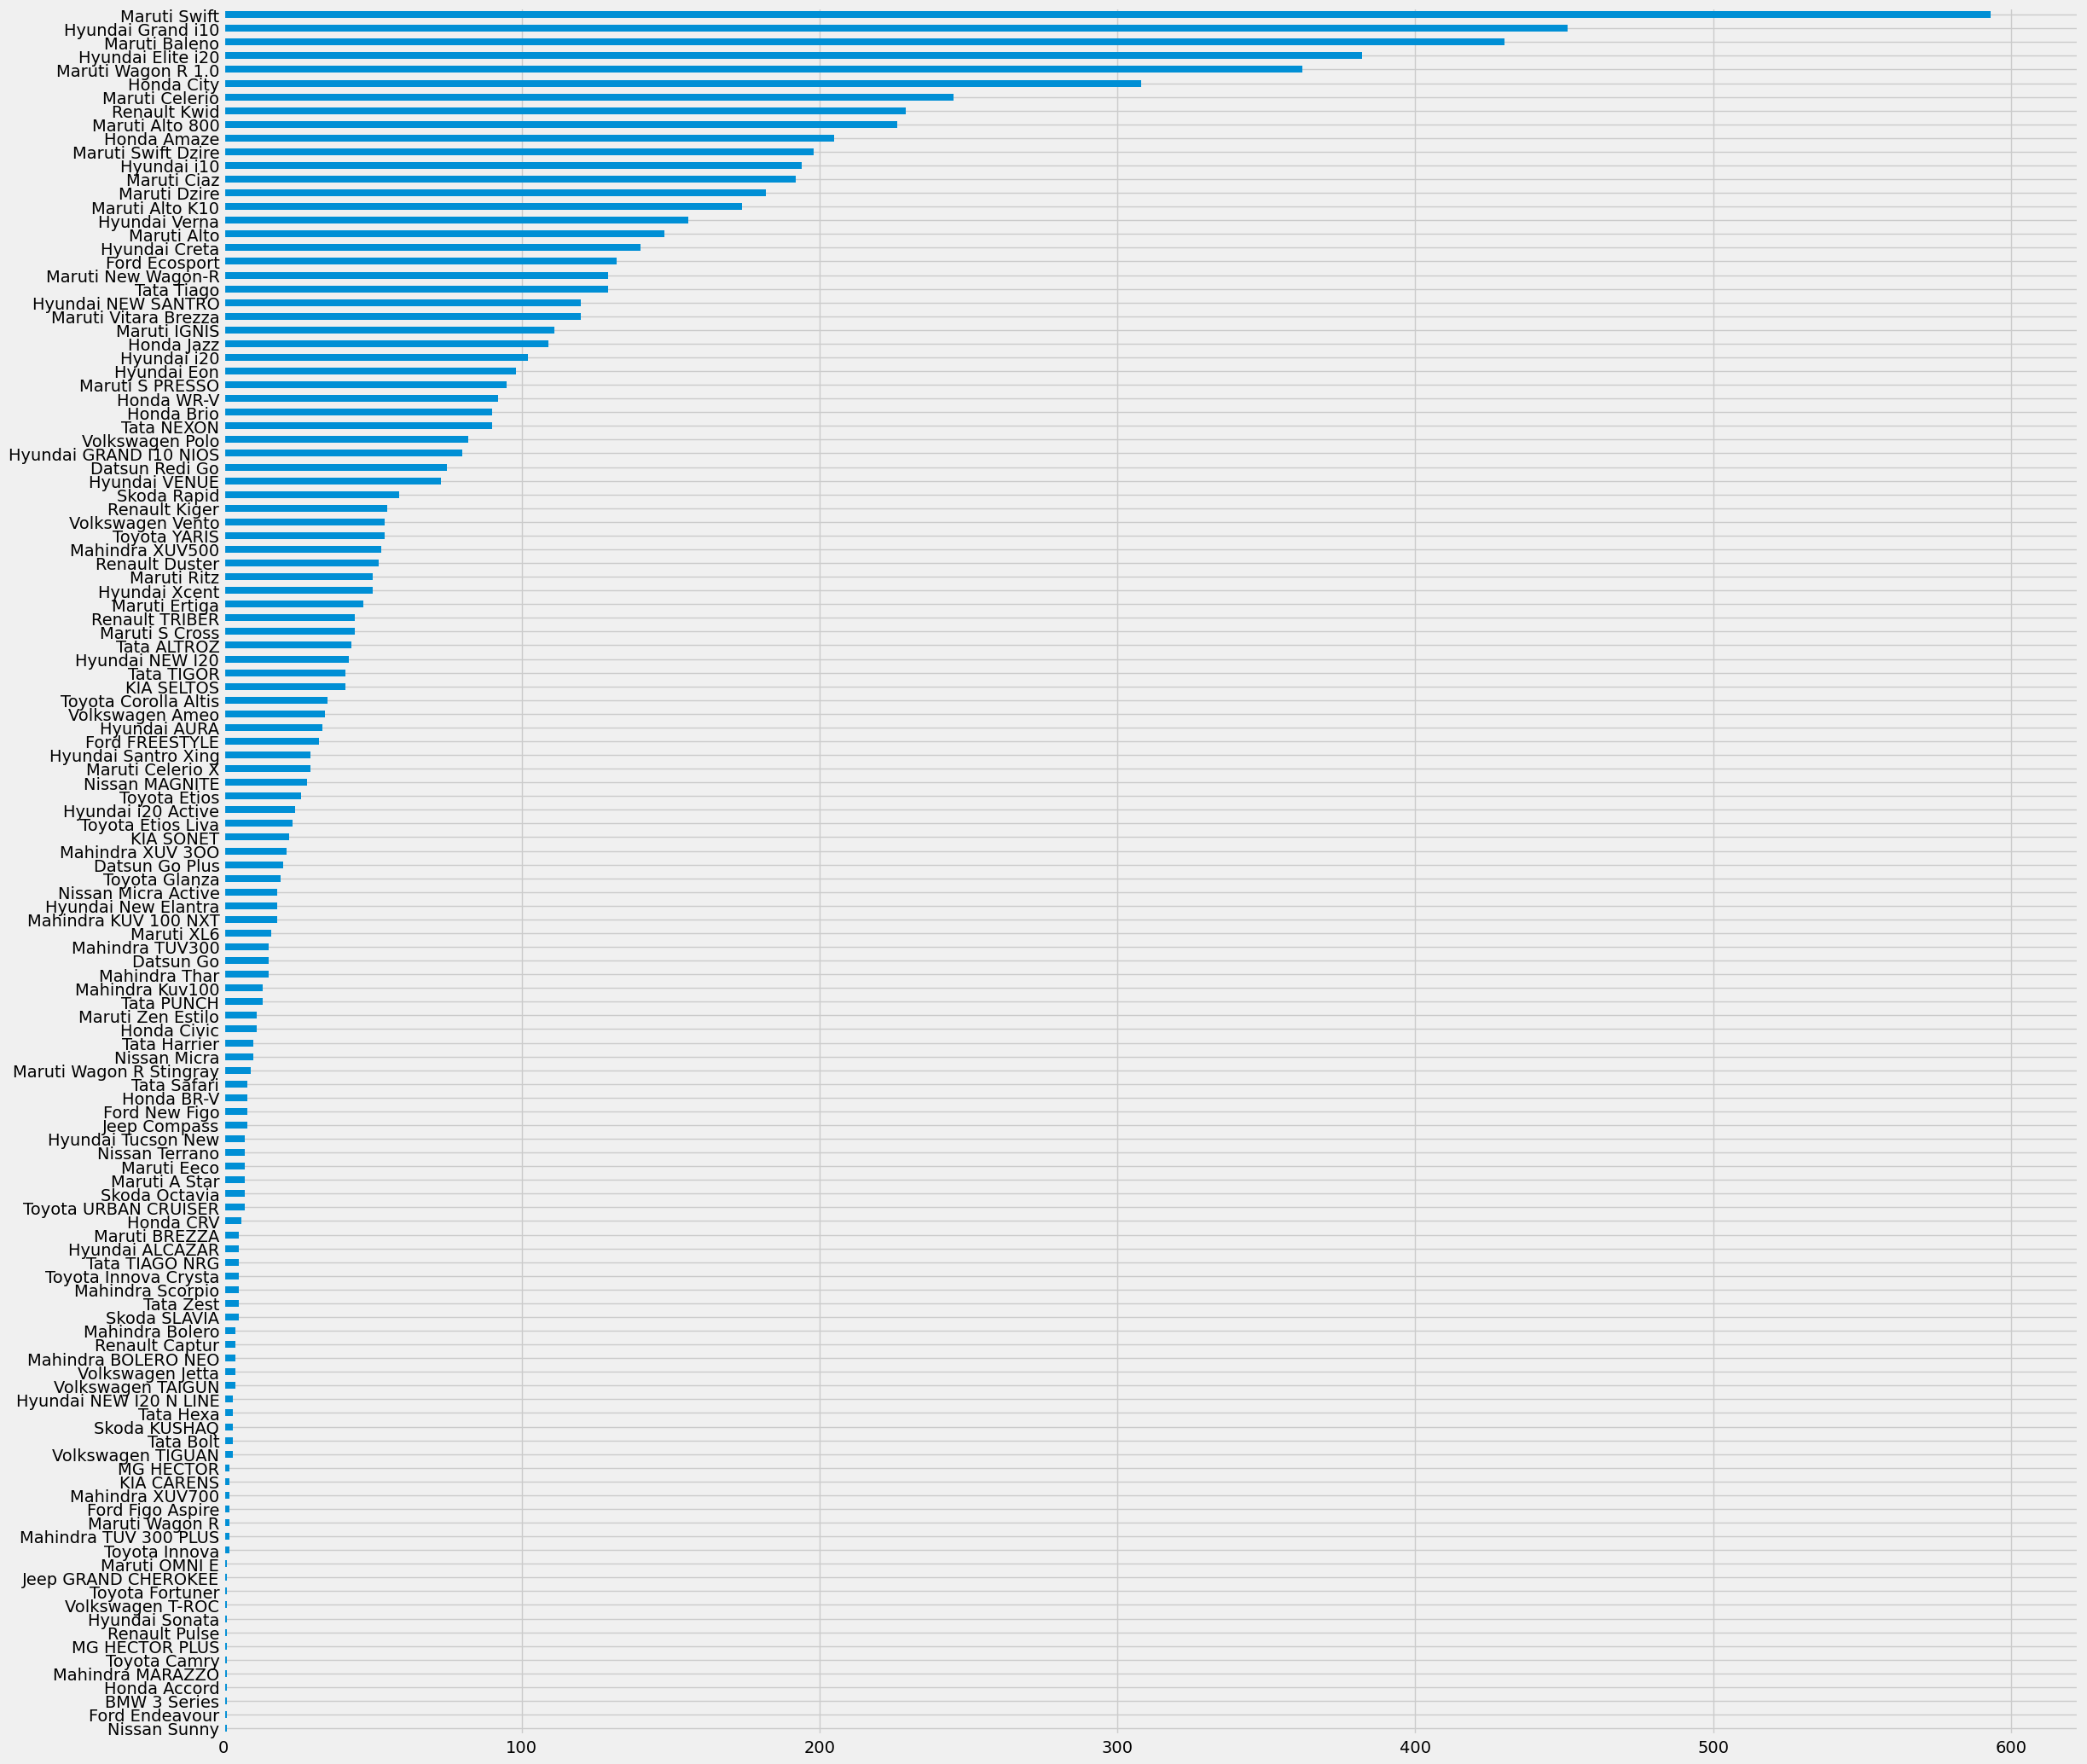

In [24]:
car_model_count = dff["Car_Name"].value_counts(ascending=True)
plt.figure(figsize=(25,25))
car_model_count.plot(kind="barh")

<Axes: xlabel='Fuel', ylabel='count'>

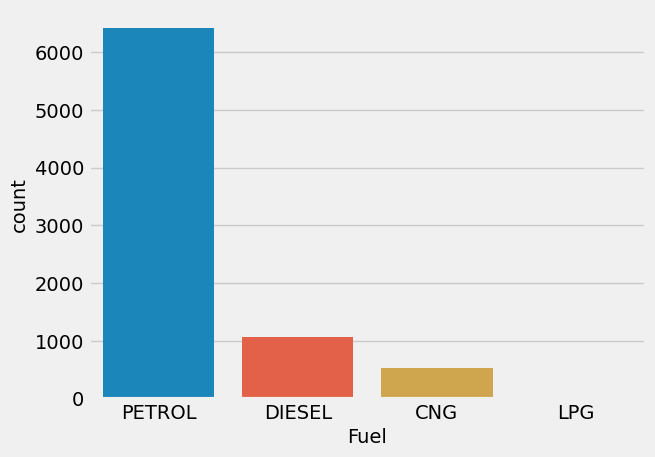

In [25]:
sns.countplot(data=dff, x="Fuel")

<Axes: xlabel='Drive', ylabel='count'>

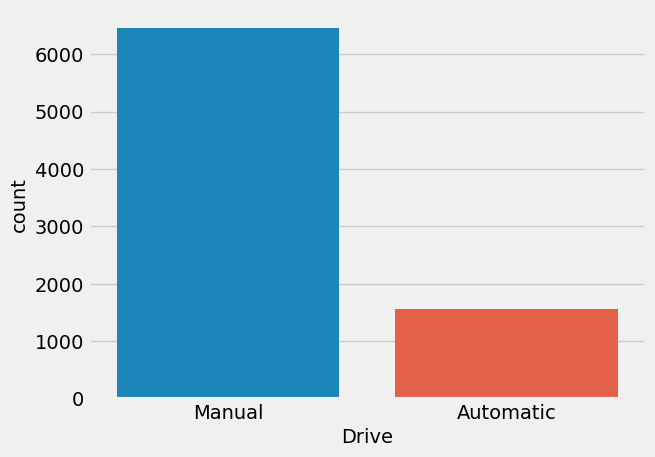

In [26]:
sns.countplot(data=dff, x="Drive")

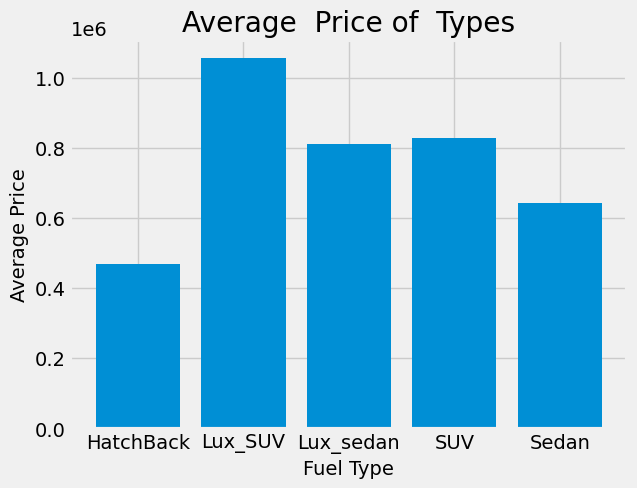

In [27]:

df = pd.DataFrame(dff)
mean_prices = df.groupby('Type')['Price'].mean()

# Plotting
plt.bar(mean_prices.index, mean_prices)
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average  Price of  Types')
plt.show()

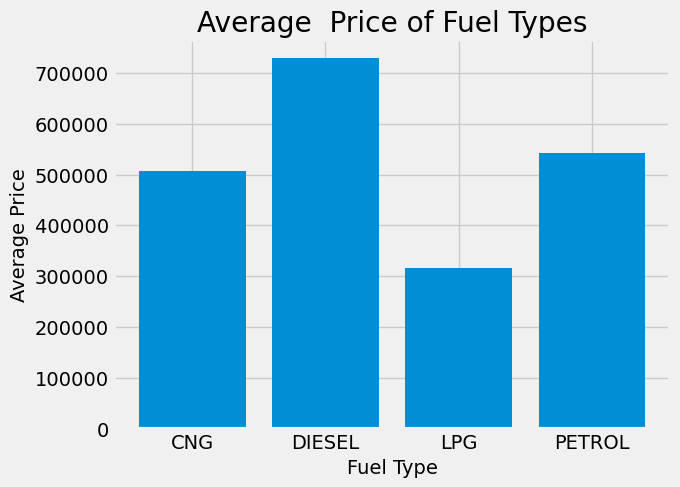

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'Fuel' and 'Price' columns
# Example data:

df = pd.DataFrame(dff)

# Calculate the mean price for each fuel type
mean_prices = df.groupby('Fuel')['Price'].mean()

# Plotting
plt.bar(mean_prices.index, mean_prices)
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average  Price of Fuel Types')
plt.show()


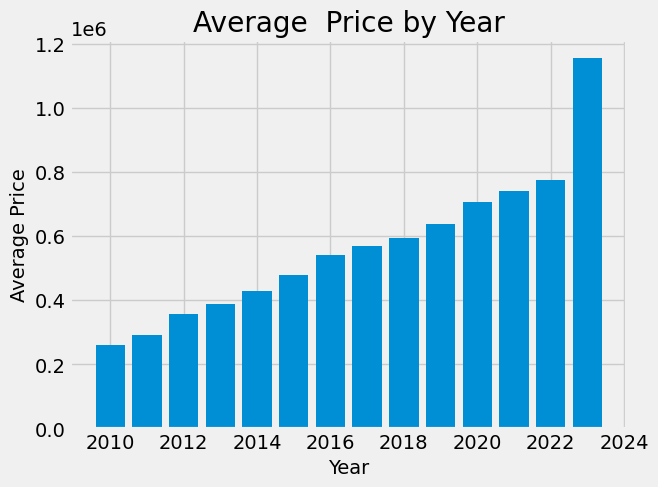

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'Fuel' and 'Price' columns
# Example data:

df = pd.DataFrame(dff)

# Calculate the mean price for each fuel type
mean_prices = df.groupby('Year')['Price'].mean()

# Plotting
plt.bar(mean_prices.index, mean_prices)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average  Price by Year')
plt.show()

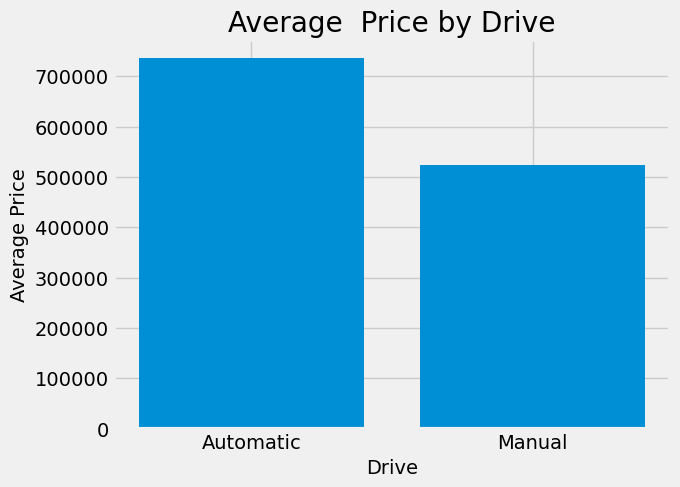

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'Fuel' and 'Price' columns
# Example data:

df = pd.DataFrame(dff)

# Calculate the mean price for each fuel type
mean_prices = df.groupby('Drive')['Price'].mean()

# Plotting
plt.bar(mean_prices.index, mean_prices)
plt.xlabel('Drive')
plt.ylabel('Average Price')
plt.title('Average  Price by Drive')
plt.show()

<Axes: >

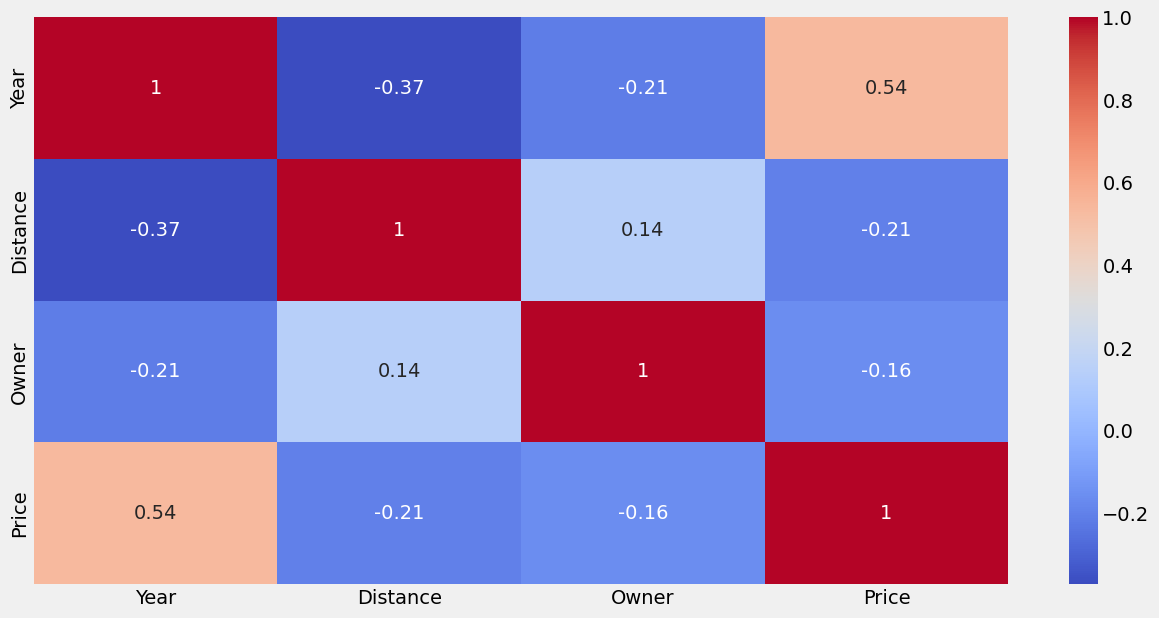

In [31]:
corr = dff.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Label Encoding

In [32]:
dff.head(10)

,Car_Name,Year,Distance,Owner,Fuel,Drive,Type,Price
0,Maruti S PRESSO,2022.0,3878,1,PETROL,Manual,HatchBack,514000
1,Hyundai Xcent,2018.0,32041,1,PETROL,Manual,Sedan,674000
2,Tata Safari,2021.0,96339,1,DIESEL,Automatic,SUV,1155500
3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,Manual,SUV,690000
4,Tata Tiago,2021.0,19811,1,PETROL,Manual,HatchBack,526000
5,Maruti Swift,2017.0,70129,1,PETROL,Manual,HatchBack,552000
6,Hyundai i20,2012.0,103781,1,PETROL,Manual,HatchBack,278000
7,Renault Kwid,2021.0,31945,2,PETROL,Automatic,HatchBack,518000
8,Hyundai Grand i10,2015.0,39950,1,PETROL,Manual,HatchBack,443000
9,Maruti Swift,2018.0,56697,1,DIESEL,Automatic,HatchBack,710350


In [33]:
# label encoding and assign in new variable
from sklearn import preprocessing
Lab_ed = preprocessing.LabelEncoder()

In [34]:
dff['Car_Name'].values

array(['Maruti S PRESSO', 'Hyundai Xcent', 'Tata Safari', ...,
       'Volkswagen Ameo', 'Hyundai GRAND I10 NIOS', 'Tata TIGOR'],
      dtype=object)

In [35]:
# Assign in new variable
dff['CarLabel'] = Lab_ed.fit_transform(dff['Car_Name'].values)
dff['FuelLabel'] = Lab_ed.fit_transform(dff['Fuel'].values)
dff['DriveLabel'] = Lab_ed.fit_transform(dff['Drive'].values)
dff['TypeLabel'] = Lab_ed.fit_transform(dff['Type'].values)

In [36]:
# check assigned values
Car = dff.groupby('Car_Name')
Car= Car['CarLabel']
Car.first()

Car_Name
BMW 3 Series           0
Datsun Go              1
Datsun Go Plus         2
Datsun Redi Go         3
Ford Ecosport          4
                    ... 
Volkswagen Polo      121
Volkswagen T-ROC     122
Volkswagen TAIGUN    123
Volkswagen TIGUAN    124
Volkswagen Vento     125
Name: CarLabel, Length: 126, dtype: int32

In [37]:
Fuels=dff.groupby('Fuel')
Fuels=Fuels['FuelLabel']
Fuels.first()

Fuel
CNG       0
DIESEL    1
LPG       2
PETROL    3
Name: FuelLabel, dtype: int32

In [38]:
Drives=dff.groupby('Drive')
Drives=Drives['DriveLabel']
Drives.first()

Drive
Automatic    0
Manual       1
Name: DriveLabel, dtype: int32

In [39]:
Types=dff.groupby('Type')
Types=Types['TypeLabel']
Types.first()

Type
HatchBack    0
Lux_SUV      1
Lux_sedan    2
SUV          3
Sedan        4
Name: TypeLabel, dtype: int32

# Feature Selection

In [40]:
dff.columns

Index(['Car_Name', 'Year', 'Distance', 'Owner', 'Fuel', 'Drive', 'Type',
       'Price', 'CarLabel', 'FuelLabel', 'DriveLabel', 'TypeLabel'],
      dtype='object')

In [41]:
# Feature selection
p_var=[ 'Year', 'Distance', 'Owner', 'CarLabel', 'FuelLabel', 'DriveLabel', 'TypeLabel']

In [42]:
# Assign feature and target variable
x=df[p_var]
y=df['Price']

In [43]:
# show the number of rows and columns of X & y
x.shape, y.shape

((8015, 7), (8015,))

In [44]:
# Print feature variable

print(x)

        Year  Distance  Owner  CarLabel  FuelLabel  DriveLabel  TypeLabel
0     2022.0      3878      1        74          3           1          0
1     2018.0     32041      1        34          3           1          4
2     2021.0     96339      1       104          1           0          3
3     2019.0     51718      1        77          1           1          3
4     2021.0     19811      1       107          3           1          0
...      ...       ...    ...       ...        ...         ...        ...
8010  2018.0     11500      1         3          3           1          0
8011  2018.0     73393      2       118          3           1          4
8012  2016.0     83810      2       119          3           1          4
8013  2019.0     39162      1        23          3           0          0
8014  2022.0     82009      2       106          3           1          4

[8015 rows x 7 columns]


In [45]:
# Print target variable
print(y)

0        514000
1        674000
2       1155500
3        690000
4        526000
         ...   
8010     292000
8011     534000
8012     424000
8013     685000
8014     392000
Name: Price, Length: 8015, dtype: int64


# Data Scaling

In [46]:
# Standard scalar
from sklearn.preprocessing import MinMaxScaler
scaler_data = MinMaxScaler()
X_scaled_data = scaler_data.fit_transform(x)

In [47]:
# Print scaled data
print(X_scaled_data, y)

[[0.92307692 0.00399295 0.         ... 1.         1.         0.        ]
 [0.61538462 0.03299074 0.         ... 1.         1.         1.        ]
 [0.84615385 0.09919461 0.         ... 0.33333333 0.         0.75      ]
 ...
 [0.46153846 0.08629424 0.33333333 ... 1.         1.         1.        ]
 [0.69230769 0.04032281 0.         ... 1.         0.         0.        ]
 [0.92307692 0.08443985 0.33333333 ... 1.         1.         1.        ]] 0        514000
1        674000
2       1155500
3        690000
4        526000
         ...   
8010     292000
8011     534000
8012     424000
8013     685000
8014     392000
Name: Price, Length: 8015, dtype: int64


# Data Splitting

In [48]:
# Importing libraries and data splitting into test and train
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.25)

In [49]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6011, 7), (2004, 7), (6011,), (2004,))

# Model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [51]:
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8015278743186836

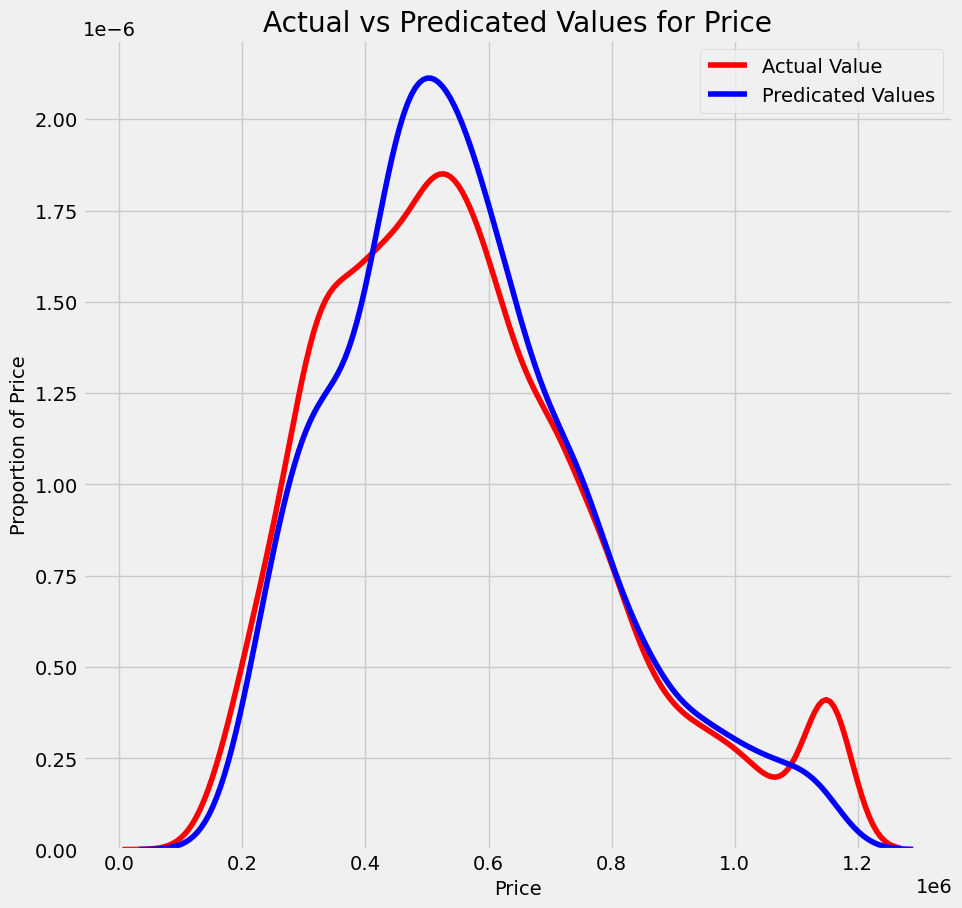

In [52]:
plt.figure(figsize=(10, 10))

ax2 = sns.distplot(dff['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicated Values" , ax=ax2)

plt.title('Actual vs Predicated Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Price')
ax2.legend()
plt.show()
plt.close()

In [53]:
actual_df = pd.DataFrame({'Actual Price': y_train})
predicted_df = pd.DataFrame({'Predicted Price': y_pred})

# Merge the DataFrames on the index
comparison_df = pd.merge(actual_df, predicted_df, left_index=True, right_index=True)

# Display the DataFrame
print(comparison_df)

      Actual Price  Predicted Price
90          810000        198147.30
854         822000        679793.00
1487        430000        413144.00
1173        682000       1024413.75
1867        397000        554309.00
...            ...              ...
78          545000        512814.70
234         324000       1141033.00
1718        509000       1047532.00
839        1155500        538400.00
1649        299000        282182.00

[1510 rows x 2 columns]


In [54]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 42)
dt_reg.fit(X_train, y_train)
dectree_y_pred=dt_reg.predict(X_test)


print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy



print('The r2_score is', r2_score(y_test, dectree_y_pred))

Decision Tree Score on Training set is 0.9999996099649365
Decision Tree Score on Test Set is 0.6751298872223774
The r2_score is 0.6751298872223774


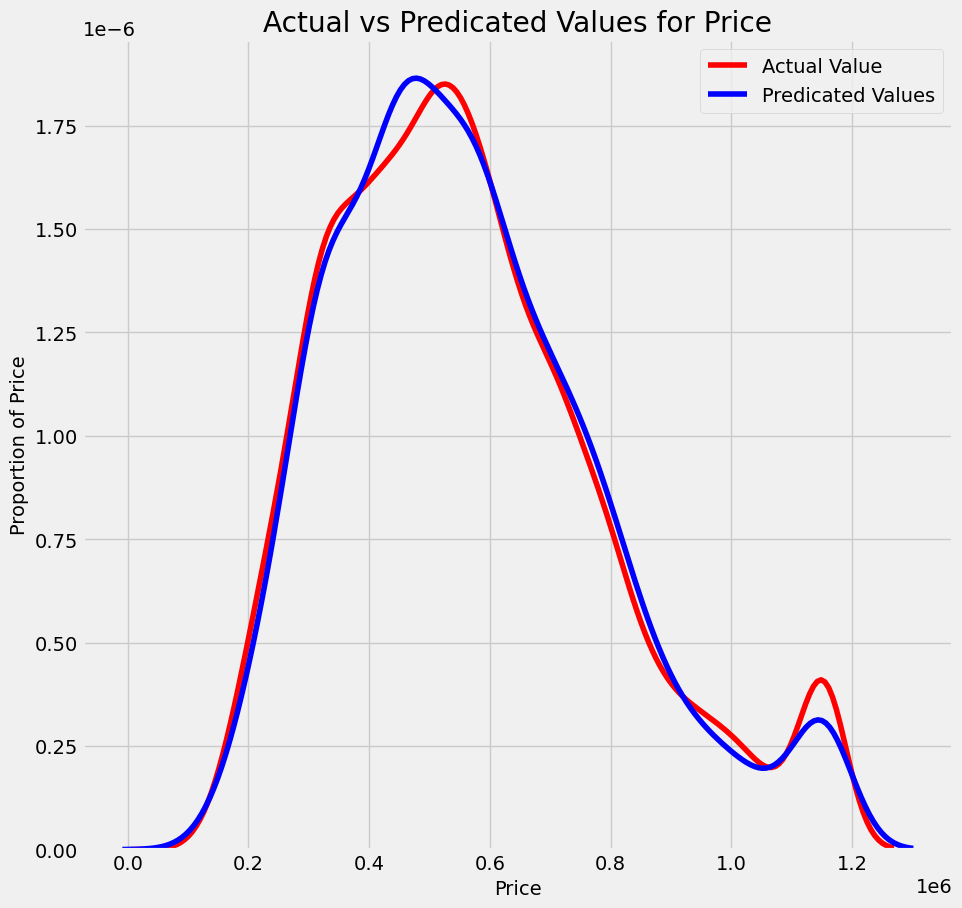

In [55]:
plt.figure(figsize=(10, 10))
ax2 = sns.distplot(dff['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(dectree_y_pred, hist=False, color="b", label="Predicated Values" , ax=ax2)
plt.title('Actual vs Predicated Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Price')
ax2.legend()
plt.show()
plt.close()